# IMPORTAR LIBRERIAS

In [1]:
!pip install tensorflow

^C


In [2]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

X = pd.read_csv('../raw_data/X_red_8.csv', index_col = 0)
y = pd.read_csv('../raw_data/y_red_2_target.csv', index_col = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'pd' is not defined

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5025, 73)
(5025, 2)
(2475, 73)
(2475, 2)


In [7]:
from sklearn.preprocessing import StandardScaler

robust_scaler = StandardScaler()

X_train_scaled = pd.DataFrame(robust_scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(robust_scaler.transform(X_test))
y_train_scaled = pd.DataFrame(robust_scaler.fit_transform(y_train))
y_test_scaled = pd.DataFrame(robust_scaler.transform(y_test))

In [8]:
X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns
y_train_scaled.columns = y_train.columns
y_test_scaled.columns = y_test.columns

In [11]:
X_train_scaled

,airchange_infiltration_vol_per_h,capacitance_kJ_perdegreK_perm3,power_VCV_kW_heat,power_VCV_kW_clim,nb_occupants,nb_PCs,facade_1_thickness_2,facade_1_window_area_percent,facade_2_thickness_2,facade_2_window_area_percent,...,IDIFF_H_night,IGLOB_H_morning,IGLOB_H_afternoon,IGLOB_H_night,RHUM_morning,RHUM_afternoon,RHUM_night,TAMB_morning,TAMB_afternoon,TAMB_night
0,0.444031,-1.349656,-1.224754,-0.998211,-1.475041,-1.432831,-0.944183,-0.007530,-1.568901,-1.231804,...,-0.737761,-0.856841,-0.736297,-0.099709,0.347952,0.348737,0.212675,0.397227,0.277244,0.359170
1,1.337964,-0.078533,-1.224754,1.001793,-0.886033,-1.432831,-1.259203,-1.228127,-0.937420,-0.010451,...,0.380345,-0.629066,-0.070525,0.261639,0.492583,0.437008,0.526239,-0.814699,-0.784452,-0.731167
2,1.337964,1.192591,-0.002918,1.001793,1.470001,-0.268257,-0.629163,-0.007530,-0.305939,-1.231804,...,-0.492274,-0.856841,-0.121083,0.417870,0.265033,0.170226,-0.047733,0.647161,0.666831,0.756810
3,-1.343835,-1.580769,-1.224754,1.001793,-0.297024,0.314029,-0.629163,1.213067,1.272765,-1.231804,...,-1.365291,-0.722573,-0.295305,-1.422821,-1.516985,-1.501525,-1.380028,-1.493660,-1.336534,-1.407668
4,-1.343835,-1.580769,-0.002918,-0.998211,0.880992,-0.850544,-0.314143,-1.228127,1.272765,1.210902,...,1.334133,0.531393,0.608238,0.871767,0.639123,0.616748,0.687121,0.279897,0.270066,0.259378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,-1.343835,0.614808,1.218918,-0.998211,-1.475041,1.478602,-1.259203,1.213067,-0.305939,-0.010451,...,0.364482,2.202548,0.541440,0.238650,0.141396,0.163342,-0.027658,1.343390,1.425969,1.284027
5021,1.337964,-0.771873,-1.224754,-0.998211,0.291984,-0.268257,-0.944183,1.213067,-1.568901,1.210902,...,0.427539,-0.856841,0.019386,0.611822,0.342226,0.375292,0.214937,1.064566,0.957228,0.976191
5022,-0.449902,-0.078533,-1.224754,-0.998211,0.880992,-1.432831,1.575979,1.213067,1.272765,1.210902,...,-0.587719,-0.856841,-0.247431,0.344544,0.277969,0.182275,-0.030486,0.670295,0.678395,0.767248
5023,1.337964,0.152581,1.218918,-0.998211,-1.475041,-0.268257,0.945938,-1.228127,0.325543,-0.010451,...,-1.602977,-0.856841,-1.021284,-1.638441,-2.531100,-2.534229,-2.384339,-1.478275,-1.496237,-1.548223


In [10]:
y_train_scaled

,T_INT_OFFICE_MEN,Q_Total
0,0.579882,-0.457324
1,-1.212655,-1.496315
2,0.462538,0.502999
3,-1.146096,-0.942815
4,0.868761,0.219483
...,...,...
5020,0.376177,1.529562
5021,0.578244,0.954715
5022,0.552366,0.179733
5023,-3.102438,-1.230964


In [12]:
from tensorflow.keras import *

2021-10-15 11:45:52.215553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-15 11:45:52.215591: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


In [16]:
def initialize_model():
    
    model = Sequential()
    model.add(layers.Dense(150, activation='relu',input_dim=73))
    
    model.add(layers.Dense(10, activation='relu', activity_regularizer=reg_l1_l2))
    
    model.add(layers.Dense(25, activation='relu'))
    
    model.add(layers.Dense(20, activation='relu'))
        
    model.add(layers.Dense(25, activation='relu'))
    
    model.add(layers.Dense(2, activation='linear'))
    
    
    model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mae'])
    
       
    
    return model

model = initialize_model()

es = EarlyStopping(patience=25, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_split=0.3,
                    #validation_data=(X_test_scaled, y_test),
                    epochs=500, #play with this until your validation loss overfit
                    batch_size=32, # Keep batch size to 16 today
                    verbose=0,
                    callbacks=[es])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 150)               11100     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                3775      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_8 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 52        
Total params: 15,972
Trainable params: 15,972
Non-trainable params: 0
_________________________________________________________________


In [18]:
results = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'The mean_absolute_error on the test set is of {results[1]:.2f}')

The mean_absolute_error on the test set is of 0.11


In [19]:
results

[0.022664139047265053, 0.1124580055475235]

In [31]:
y_pred= model.predict(X_test_scaled)

In [32]:
data_df = pd.DataFrame(y_pred)

In [33]:
data_df

,0,1
0,0.195783,0.058892
1,-0.502247,-0.808142
2,0.430228,-0.464087
3,0.768741,2.197523
4,0.244764,-0.512304
...,...,...
2470,0.489345,0.019963
2471,-1.011290,-0.626676
2472,-0.232833,-0.913471
2473,-1.691227,-1.225560


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,0.3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('Model mean_absolute_error')
    ax[1].set_ylabel('mean_absolute_error')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,0.5))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

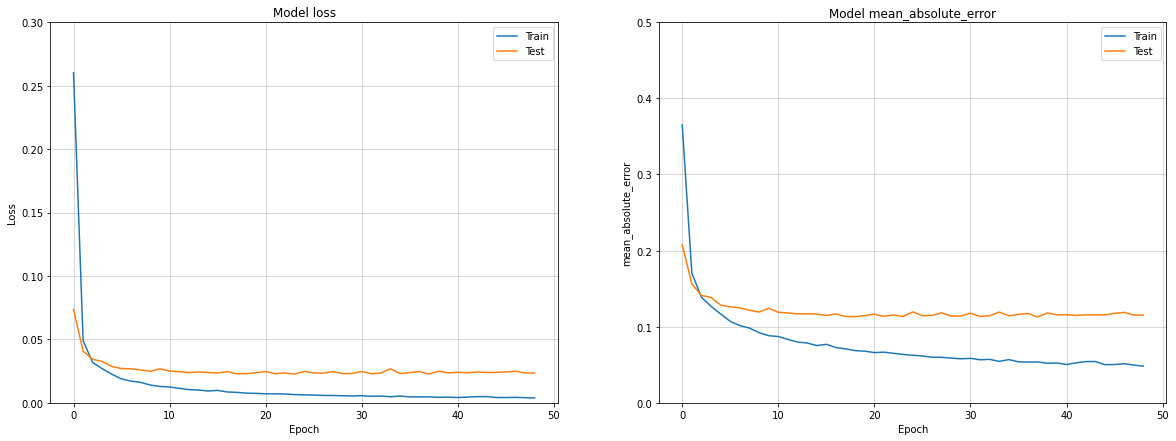

In [30]:
plot_loss_accuracy(history)